In [1]:
import numpy as np
import matplotlib.pyplot as plt
import quimb as qu
import quimb.tensor as qtn

In [2]:
def build_spin1_ham(N, D1, D2, J=1.0):
    ham = qtn.SpinHam1D(S=1, cyclic=False)

    ham += J, 'X', 'X'
    ham += J, 'Y', 'Y'
    ham += J, 'Z', 'Z'

    Sz = qu.spin_operator('Z', S=1)
    Sz2 = Sz @ Sz 

    for i in range(N):
        D = D1 + ((-1) ** i) * D2
        ham[i] += D, Sz2

    return ham

In [3]:
def compute_ground_state(N, D1, D2, chi_max=100):
    ham = build_spin1_ham(N, D1, D2)
    mpo = ham.build_mpo(N)

    dmrg = qtn.tensor_dmrg.DMRG(ham=mpo, bond_dims=chi_max)
    dmrg.solve(tol = 1e-8, verbosity = 0)
    state = dmrg.state
    return state


In [4]:
def fidelity_susceptibility(N, D1, D2, delta=0.01, chi_max=100):
    psi1 = compute_ground_state(N, D1, D2, chi_max)
    psi2 = compute_ground_state(N, D1 + delta, D2, chi_max)

    overlap = abs(psi1.H @ psi2) ** 2
    chi = -2 * (1 - overlap) / (delta ** 2)
    return chi


In [5]:
def scan_phase_diagram(N=5,chi_max=50):
    D1_vals = np.linspace(-3, 3, 25)
    D2_vals = np.linspace(-3, 3, 25)
    chi_map = np.zeros((len(D1_vals), len(D2_vals)))

    for i, D1 in enumerate(D1_vals):
        for j, D2 in enumerate(D2_vals):

            chi_map[i,j] = fidelity_susceptibility(N, D1, D2, delta=0.01, chi_max=chi_max)

    return D1_vals, D2_vals, chi_map

In [6]:
def plot_phase_diagram(D1_vals, D2_vals, chi_map):
    plt.figure(figsize=(6, 5))
    plt.imshow(chi_map.T, origin='lower', extent=(D1_vals[0], D1_vals[-1], D2_vals[0], D2_vals[-1]),
               aspect='auto', cmap='magma')
    plt.xlabel(r'$D_1$')
    plt.ylabel(r'$D_2$')
    plt.title('Fidelity Susceptibility Phase Diagram')
    plt.tight_layout()
    plt.show()

In [7]:
D1, D2, chi = scan_phase_diagram(N=200, chi_max=3)

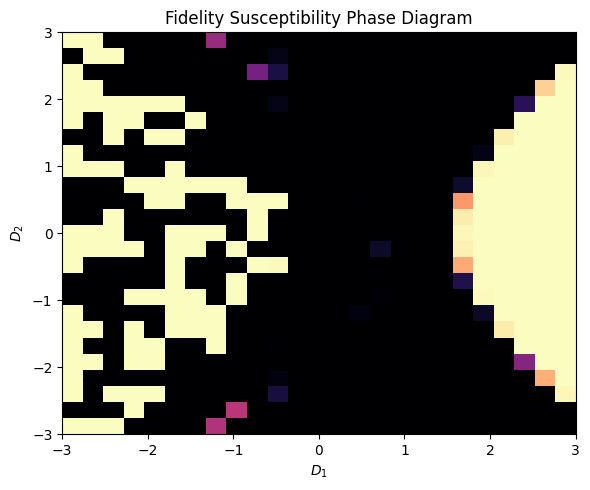

In [9]:
plot_phase_diagram(D1, D2, chi)

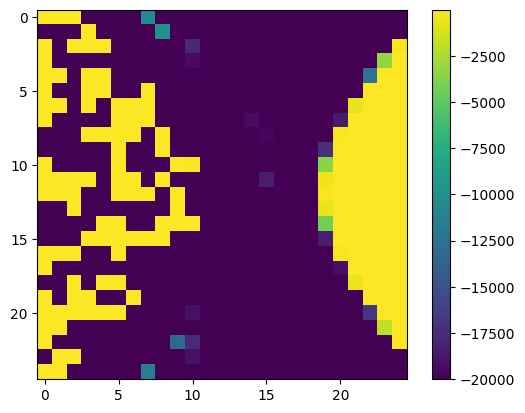

In [15]:
plt.imshow(chi.T)
plt.colorbar()